In [51]:
#@title Preparing the data
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Loading the data
df = pd.read_csv('Data.csv')
X = df.iloc[:, 1:]
# Handling categorical data
X = pd.get_dummies(X).values


Text(0, 0.5, 'WCSS')

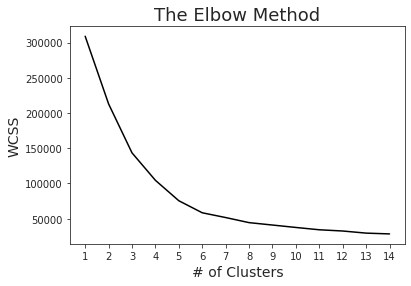

In [71]:
#@title Estimate the number of clusters (the Elbow method)
from sklearn.cluster import KMeans
# Collect results for Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                  random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plotting the WCSS vs Number of Clusters
sns.lineplot(x = range(1, 15), y = wcss, color = 'black')
plt.xticks(range(1, 15))
plt.title('The Elbow Method', size = 18)
plt.xlabel('# of Clusters', size = 14)
plt.ylabel('WCSS', size = 14)

In [72]:
#@title Training the K-Means with 5 clusters
# Train the model
model = KMeans(n_clusters = 5, init = 'k-means++',
               random_state = 42)
y_pred = model.fit_predict(X)

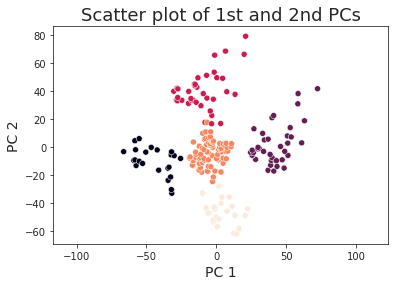

In [76]:
#@title Visualizing the Clusters with Principal Component Analysis
# Fitting the PCA with the data
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
# Visualizing the clusters with first and second Principal Components
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], c = y_pred)
plt.title("Scatter plot of 1st and 2nd PCs", size=18)
plt.xlabel("PC 1", size=14)
plt.ylabel("PC 2", size=14)
plt.axis("equal")
plt.show()